# PART 1

In this part, we will use multiple machine learning algorithms to detect survival chances. I have directly implemented the models without manipulating the training and testing dataset. 

In [1]:
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

print("Scikit version: ", sklearn.__version__)

Scikit version:  0.20.0


**Read training dataset file**

In [2]:
data_manipoulation = False

filename = 'train.csv'
data = pd.read_csv(filename)

column, row = data.shape
print("size of dataset: ", (column, row))

# print first 5 examplesof dataset
print("Dataset: \n", data.head()) 

size of dataset:  (891, 12)
Dataset: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

**Data slicing**- Seperate out traning set and training label and eliminate features which has NaN values.

In [3]:
# print (list(data.columns.values))
if data_manipoulation == False:
    X = data.drop(['Survived','Embarked','Cabin','Ticket','Sex','Name','Age'],axis=1)
    Y = data['Survived']
    # split dataset
    X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)

Do not run PART 2 if not want to use data manipulation! Directly go to **Implementation of ML algorithms**

# PART 2

First, we built and trained model by removing the categorical features in dataset. Now, we will use mapping and manipulation to add more features to increase accuracy.

In [3]:
sex_mapping = {'male': 1, 'female': 0}
data['Sex'] = data['Sex'].map(sex_mapping)

# print first 5 examplesof dataset
print("Dataset: \n", data.head()) 

Dataset: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


Find unique values in Embarked, Cabin, Age.

In [4]:
print("Unique values in Embarked: ", data.Embarked.unique())
print("Unique values in Cabin: ", data.Cabin.unique())
print("Unique values in Age: ", data.Age.unique())

Unique values in Embarked:  ['S' 'C' 'Q' nan]
Unique values in Cabin:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17'

Interpret NaN values for Age.

In [5]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

# print first 5 examplesof dataset
print("Dataset: \n", data.head()) 

Dataset: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [6]:
data = data.fillna(data['Embarked'].value_counts().index[0])

embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(embarked_mapping)

# print first 5 examplesof dataset
print("Dataset: \n", data.head()) 

Dataset: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500     S         0  
1          PC 17599  71.2833   C85         1  
2  STON/O2. 3101282   7.9250     S         0  
3            113803  53.1000  C123         0  
4            373450   8.0500     S         0  


In [7]:
X = data.drop(['Survived','Cabin','Ticket','Name'],axis=1)
Y = data['Survived']

# split dataset
X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.2, random_state=42)

# Implementation of ML algorithms

**1. Decision Tree Classifier with Information Gain**

In [8]:
training_accuracy = []
validation_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf = 2, random_state=0)
    tree.fit(X_train, Y_train)
    training_accuracy.append(tree.score(X_train, Y_train))
    validation_accuracy.append(tree.score(X_cv, Y_cv))

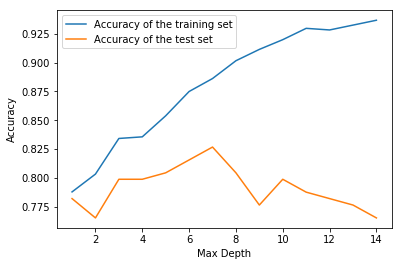

In [9]:
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,validation_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [10]:
training_accuracy = np.array(training_accuracy)
validation_accuracy = np.array(validation_accuracy)
difference = 1*(abs(training_accuracy-validation_accuracy) < 1e-2)
temp = max(validation_accuracy*difference)
temp1 = validation_accuracy*difference
index = list(temp1.tolist()).index(temp)

tree_acc = 100*validation_accuracy[index]

print("Accuracy of the test set for depth at {}: {:.3f} %" .format(index+1, tree_acc))

Accuracy of the test set for depth at 1: 78.212 %


**2. Support Vector Machine (Gaussian Kernel)**

In [11]:
svc = SVC()
svc.fit(X_train, Y_train) 

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Determine prediction**

In [12]:
prediction = svc.predict(X_cv)
print("\nAccuracy: ", round(100*accuracy_score(Y_cv,prediction),2))
print("\nOr we can use score() to find accuracy!")
svm_acc = round(100*svc.score(X_cv,Y_cv),2)
print("\nAccuracy: ", svm_acc)


Accuracy:  59.22

Or we can use score() to find accuracy!

Accuracy:  59.22


**3. Linear Support vector machine (Linear Kernel)**

In [13]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

**Determine prediction**

In [14]:
lsvm_acc = round(100*linear_svc.score(X_cv,Y_cv),2)
print("\nAccuracy: ", lsvm_acc)


Accuracy:  72.63


**4. K-Nearest Neighbor**

In [15]:
K = 25
neighbors_setting = list(range(1,K+1))

training_accuracy = []
validation_accuracy = []

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    training_accuracy.append(knn.score(X_train, Y_train))
    validation_accuracy.append(knn.score(X_cv, Y_cv))

# reshaping train and test accuracy    
training_accuracy = np.reshape(training_accuracy, (len(training_accuracy), 1))
validation_accuracy = np.reshape(validation_accuracy, (len(validation_accuracy), 1))

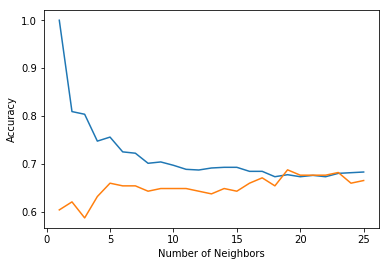

In [16]:
plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, validation_accuracy, label='Accuracy of the validation set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

In [17]:
difference = 1*(abs(training_accuracy-validation_accuracy) < 1e-2)
temp = max(validation_accuracy*difference)
temp1 = validation_accuracy*difference
index = list(temp1.tolist()).index(temp)

knn_acc = 100*validation_accuracy[index,0]

print("Accuracy of the validation set for {}-NN: {:.3f} %" .format(index+1, knn_acc))

Accuracy of the validation set for 23-NN: 68.156 %


**5. Gaussian Naive Bayes**

In [18]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Determine prediction**

In [19]:
gnb_acc = round(100*gaussian.score(X_cv,Y_cv),2)
print("\nAccuracy: ", gnb_acc)


Accuracy:  77.65


**6. Perceptron**

In [20]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

**Determine prediction**

In [21]:
p_acc = round(100*perceptron.score(X_cv,Y_cv),2)
print("\nAccuracy: ", p_acc)


Accuracy:  43.58


**7. Stochastic Gradient Descent**

In [22]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

**Determine prediction**

In [23]:
sgd_acc = round(100*sgd.score(X_cv,Y_cv),2)
print("\nAccuracy: ", sgd_acc)


Accuracy:  64.25


**8. Logistic Regression**

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Determine prediction**

In [25]:
lr_acc = round(100*sgd.score(X_cv,Y_cv),2)
print("\nAccuracy: ", lr_acc)


Accuracy:  64.25


**9. Random Forest**

In [26]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Determine prediction**

In [27]:
rf_acc = round(100*random_forest.score(X_cv,Y_cv),2)
print("\nAccuracy: ", rf_acc)


Accuracy:  81.01


In [28]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Support Vector Machine', 'Linear Support Vector Machine', 'K-NN', 'Gaussian Naive Bayes',
              'Perceptron', 'Stochastic Gradient Decent', 'Logistic Regression', 'Random Forest'],
    'Score': [tree_acc, svm_acc, lsvm_acc, knn_acc, gnb_acc, 
              p_acc, sgd_acc, lr_acc, rf_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Random Forest,81.010000
0,Decision Tree,78.212291
4,Gaussian Naive Bayes,77.650000
2,Linear Support Vector Machine,72.630000
3,K-NN,68.156425
6,Stochastic Gradient Decent,64.250000
7,Logistic Regression,64.250000
1,Support Vector Machine,59.220000
5,Perceptron,43.580000
